In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree

In [3]:
def data_results(testing_classes, testing_inputs, alg_class):
    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(testing_classes, alg_class.predict(testing_inputs))
    )

    cm_display.plot()
    plt.xticks([0, 1], ["No", "Yes"])
    plt.yticks([0, 1], ["No", "Yes"])
    plt.xlabel('Predicted Entry')
    plt.ylabel('Actual Entry')
    plt.show()

    print(classification_report(testing_classes, alg_class.predict(testing_inputs)))

rank                   0
playoff                0
won                    0
PER                    0
Cumulative Win Rate    0
dtype: int64
Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17200\1768410169.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_test['predict'] = probs
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17200\1768410169.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_test['result'] = abs(df_teams_test['predict'] - df_teams_test['playoffNextYear'])


3.410691003911343
     tmID   predict
1       0  0.525424
12      2  0.230769
23      4  0.230769
33      5  0.525424
52      7  1.000000
62      8  1.000000
75     10  0.525424
85     11  0.525424
98     13  1.000000
118    16  1.000000
128    17  0.525424
141    19  0.525424
{'ATL': 0, 'CHA': 1, 'CHI': 2, 'CLE': 3, 'CON': 4, 'DET': 5, 'HOU': 6, 'IND': 7, 'LAS': 8, 'MIA': 9, 'MIN': 10, 'NYL': 11, 'ORL': 12, 'PHO': 13, 'POR': 14, 'SAC': 15, 'SAS': 16, 'SEA': 17, 'UTA': 18, 'WAS': 19}


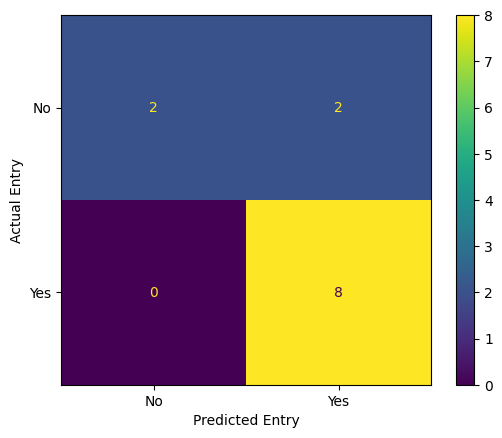

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.80      1.00      0.89         8

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87      0.83      0.81        12



In [4]:
df_teams = pd.read_csv('dataset/processed/teams_test.csv')
df_teams = df_teams.sort_values(by=['franchID', 'year'])
df_teams['playoffNextYear'] = df_teams['playoff'].shift(-1)
df_teams.loc[df_teams['franchID'] != df_teams['franchID'].shift(-1), 'playoffNextYear'] = None
df_teams.dropna(subset=['playoffNextYear'], inplace=True)
#df_teams["confW"] = df_teams["confW"].fillna(0)
#df_teams = df_teams.fillna(-1)
label_encoder_tmID = LabelEncoder()
label_encoder_playoff = LabelEncoder()
label_encoder_playoffNextYear = LabelEncoder()

df_teams['tmID'] = label_encoder_tmID.fit_transform(df_teams['tmID'])
tmID_label_mapping = dict(zip(label_encoder_tmID.classes_, label_encoder_tmID.transform(label_encoder_tmID.classes_)))
df_teams['playoff'] = label_encoder_playoff.fit_transform(df_teams['playoff'])
df_teams['playoffNextYear'] = label_encoder_playoffNextYear.fit_transform(df_teams['playoffNextYear'])
features = ['rank', 'playoff', 'won', 'PER', 'Cumulative Win Rate'] # attend?

df_teams_train = df_teams[df_teams['year'] <= 9]
df_teams_test = df_teams[df_teams['year'].isin([10])]
# df_teams_train = df_teams[df_teams['year'] <= 5]
# df_teams_test = df_teams[df_teams['year'].isin([6])]

training_inputs = df_teams_train[features]
training_classes = df_teams_train['playoffNextYear']
testing_inputs = df_teams_test[features]
testing_classes = df_teams_test['playoffNextYear']
print(training_inputs.isna().sum())
#print(df_teams_train[df_teams_train['tmID'] == "CHA"][['year', 'PER', 'coachID', 'Cumulative Win Rate', 'playoff', 'playoffNextYear']])

dt_class = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_class,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(training_inputs, training_classes)
# print(training_inputs.isna().sum())

best_model = grid_search.best_estimator_
best_model.predict(testing_inputs)

best_model.score(testing_inputs, testing_classes)
accuracy_score(testing_classes, best_model.predict(testing_inputs))
#importance = best_model.feature_importances_
#for feature, imp in zip(features, importance):
#    print(f"Feature: {feature}, Importance: {imp}")

'''f = open("results.txt", "a")
f.write("Year 9 Accuracy = " + str(accuracy_score(testing_classes, dt_class.predict(testing_inputs))) + "\n")
f.close()'''

probs = [pred[1] for pred in best_model.predict_proba(testing_inputs)]
df_teams_test['predict'] = probs
df_teams_test['result'] = abs(df_teams_test['predict'] - df_teams_test['playoffNextYear'])
print(df_teams_test['result'].sum())
print(df_teams_test[['tmID', 'predict']])
print(tmID_label_mapping)

data_results(testing_classes, testing_inputs, best_model)

# plot_tree(dt_class, feature_names=features, filled=True)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17200\3150004291.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_test['predict'] = probs
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17200\3150004291.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams_test['result'] = abs(df_teams_test['predict'] - df_teams_test['playoffNextYear'])


4.024647020871286


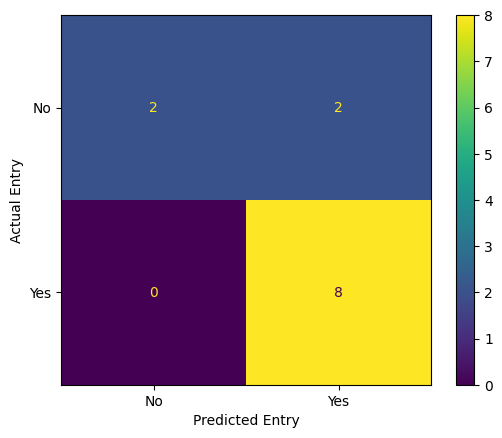

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.80      1.00      0.89         8

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87      0.83      0.81        12



In [5]:
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(training_inputs, training_classes)

# print(rf_class.predict_proba(training_inputs))

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

grid_search = GridSearchCV(estimator=rf_class, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(training_inputs, training_classes)
best_model = grid_search.best_estimator_
best_model.predict(testing_inputs)

best_model.score(testing_inputs, testing_classes)

# rf_class.fit(training_inputs, training_classes)
probs = [pred[1] for pred in best_model.predict_proba(testing_inputs)]
df_teams_test['predict'] = probs
df_teams_test['result'] = abs(df_teams_test['predict'] - df_teams_test['playoffNextYear'])
print(df_teams_test['result'].sum())
accuracy_score(testing_classes, best_model.predict(testing_inputs))

data_results(testing_classes, testing_inputs, best_model)

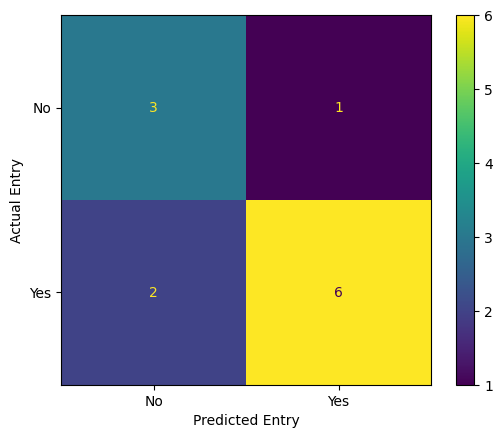

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.86      0.75      0.80         8

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



In [6]:
nb_class = GaussianNB()
nb_class.fit(training_inputs, training_classes)

nb_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, nb_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, nb_class)

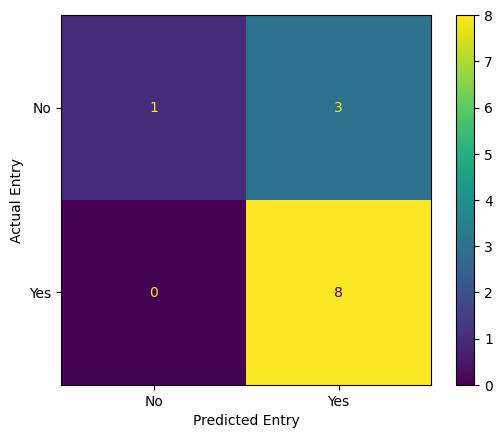

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.73      1.00      0.84         8

    accuracy                           0.75        12
   macro avg       0.86      0.62      0.62        12
weighted avg       0.82      0.75      0.69        12



In [7]:
svm_class = SVC(kernel='rbf', probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(estimator=svm_class, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(training_inputs, training_classes)
best_model = grid_search.best_estimator_
accuracy_score(testing_classes, best_model.predict(testing_inputs))

'''f = open("results.txt", "a")
f.write("Year 9 Accuracy = " + str(accuracy_score(testing_classes, dt_class.predict(testing_inputs))) + "\n")
f.close()'''

#best_model.fit(training_inputs, training_classes)
#probs = [pred[1] for pred in best_model.predict_proba(testing_inputs)]
#df_teams_test['predict'] = probs
#df_teams_test['result'] = abs(df_teams_test['predict'] - df_teams_test['playoffNextYear'])
#print(df_teams_test['result'].sum())

data_results(testing_classes, testing_inputs, best_model)

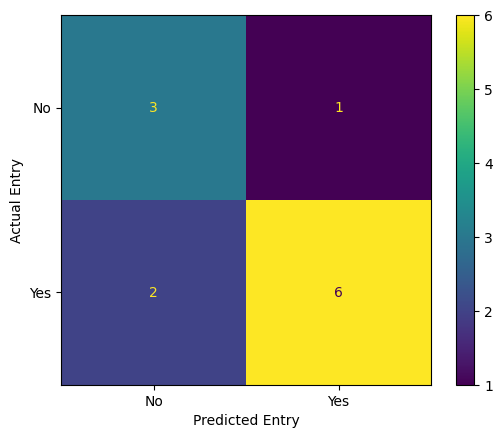

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.86      0.75      0.80         8

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



In [8]:
knn_class = KNeighborsClassifier(n_neighbors=13, algorithm='auto', metric='minkowski', p=1, weights='distance')

'''param_grid = {
        'n_neighbors': np.arange(2, 30, 1),
        'metric': ['minkowski', 'euclidean', 'manhattan'],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
knn_cv = GridSearchCV(knn_class, param_grid=param_grid, cv=kf, verbose=1)
knn_cv.fit(training_inputs, training_classes)
print(knn_cv.best_params_)'''

knn_class.fit(training_inputs, training_classes)

knn_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, knn_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, knn_class)

In [9]:
ann_class = MLPClassifier(random_state=42, max_iter=300)

'''param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],  # Number of neurons in the hidden layers
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'max_iter': [200, 500, 1000],  # Maximum number of iterations
    'batch_size': [32, 64, 128],  # Mini-batch sizes
    'early_stopping': [True],  # Whether to use early stopping
    'n_iter_no_change': [10, 20]  # Number of iterations with no improvement for early stopping
}

grid_search = GridSearchCV(
    estimator=ann_class,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(training_inputs, training_classes)
# print(training_inputs.isna().sum())

best_model = grid_search.best_estimator_
best_model.predict(testing_inputs)

best_model.score(testing_inputs, testing_classes)
accuracy_score(testing_classes, best_model.predict(testing_inputs))
probs = [pred[1] for pred in best_model.predict_proba(testing_inputs)]
df_teams_test['predict'] = probs
df_teams_test['result'] = abs(df_teams_test['predict'] - df_teams_test['playoffNextYear'])
print(df_teams_test['result'].sum())'''

#ann_class.fit(training_inputs, training_classes)

#ann_class.score(testing_inputs, testing_classes)

#accuracy_score(testing_classes, ann_class.predict(testing_inputs))

#data_results(testing_classes, testing_inputs, ann_class)

"param_grid = {\n    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],  # Number of neurons in the hidden layers\n    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions\n    'solver': ['adam', 'sgd'],  # Optimization algorithms\n    'alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization parameter\n    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule\n    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate\n    'max_iter': [200, 500, 1000],  # Maximum number of iterations\n    'batch_size': [32, 64, 128],  # Mini-batch sizes\n    'early_stopping': [True],  # Whether to use early stopping\n    'n_iter_no_change': [10, 20]  # Number of iterations with no improvement for early stopping\n}\n\ngrid_search = GridSearchCV(\n    estimator=ann_class,\n    param_grid=param_grid,\n    scoring='accuracy',\n    cv=5,\n    verbose=1,\n    n_jobs=-1\n)\n\ngrid_search.fit(training_inputs, training_classes)\n# print(training_in

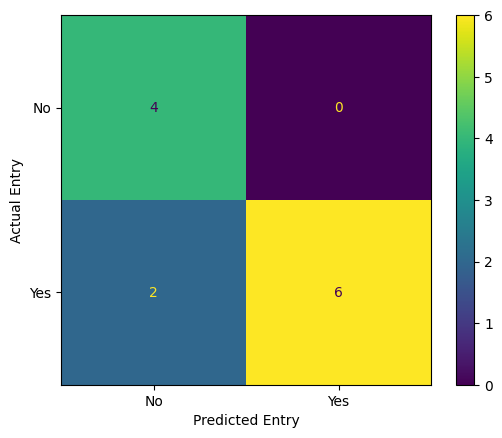

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.75      0.86         8

    accuracy                           0.83        12
   macro avg       0.83      0.88      0.83        12
weighted avg       0.89      0.83      0.84        12



In [10]:
ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
'''param_grid = {
        'n_estimators': np.arange(10, 100, 10),
        'algorithm': ['SAMME', 'SAMME.R'],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
ab_cv = GridSearchCV(ab_class, param_grid=param_grid, cv=kf, verbose=1)
ab_cv.fit(training_inputs, training_classes)
print(ab_cv.best_params_)'''

ab_class.fit(training_inputs, training_classes)
ab_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ab_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ab_class)

In [11]:
'''for w in df_teams['confW']:
    print(w)
nan_count = df_teams['confW'].isna().sum()
print(nan_count)'''

#print(df_teams.isna().sum())

#df_teams.head(164)

df_teams.head(30)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,homeL,awayW,awayL,confW,confL,min,PER,coachID,Cumulative Win Rate,playoffNextYear
0,9,0,ATL,EA,7,0,NaN,NaN,NaN,Atlanta Dream,...,16,3,14,2,18,6825,3.160357,meadoma99w,0.117647,1
1,10,0,ATL,EA,2,1,L,NaN,NaN,Atlanta Dream,...,5,6,11,10,12,6950,3.313946,meadoma99w,0.308824,1
2,1,1,CHA,EA,8,0,NaN,NaN,NaN,Charlotte Sting,...,11,3,13,5,16,6475,3.152351,dunntr01wc,0.281250,1
3,2,1,CHA,EA,4,1,W,W,L,Charlotte Sting,...,5,7,9,15,6,6500,3.357608,donovan99w,0.415625,1
4,3,1,CHA,EA,2,1,L,NaN,NaN,Charlotte Sting,...,5,7,9,12,9,6450,3.222922,donovan99w,0.513779,1
5,4,1,CHA,EA,2,1,L,NaN,NaN,Charlotte Sting,...,4,5,12,12,12,6850,3.168911,laceytr99w,0.500000,0
6,5,1,CHA,EA,5,0,NaN,NaN,NaN,Charlotte Sting,...,7,6,11,8,12,6900,3.259226,laceytr99w,0.485294,0
7,6,1,CHA,EA,6,0,NaN,NaN,NaN,Charlotte Sting,...,12,1,16,4,16,6945,3.050083,laceytr99w,0.513779,0
9,7,2,CHI,EA,7,0,NaN,NaN,NaN,Chicago Sky,...,14,2,15,4,16,6800,3.116197,cowenda01w,0.513779,0
10,8,2,CHI,EA,6,0,NaN,NaN,NaN,Chicago Sky,...,11,8,9,6,14,6972,3.140279,overtbo99w,0.513779,0
